Step 1: Loading the libraries and setting the height and width of the graph

In [1]:
#importing the libraries
#  Visualization
library(ggplot2)

# Data manipulation
library(tibble)
library(dplyr)
library(tidyr)
library(purrr)
library(readr)

# Modelling and Preprocessing
library(tidymodels)

# Data splitting and resampling
library(rsample) # train_test_split_equivalent
library(tune) # GridSearchCV equivalent
library(workflows) #make_pipeline equivalent
library(recipes) #make_column_transformer and StandardScaler equivalent

# Metrics
library(yardstick) # for mean squared error

#Time and Dates
library(lubridate)


#formatting graphs
options(repr.plot.width=12, repr.plot.height=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, 

Step 2: Loading the data into R

In [2]:
#loading data into R
players<-read_csv("players.csv")
players
sessions<- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
# CONVERT START_TIME AND END_TIME TO DATETIME
sessions<-sessions|>
mutate( start_time= dmy_hm(start_time), end_time= dmy_hm(end_time))
sessions


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


In [4]:
#CONVERT THE TIMEZONE FROM GMT TO PST
sessions <- sessions |>
  mutate(
    start_time = with_tz(force_tz(start_time, tzone = "GMT"), tzone = "America/Los_Angeles"),
    end_time = with_tz(force_tz(end_time, tzone = "GMT"), tzone = "America/Los_Angeles")
  )
sessions 


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 11:12:00,2024-06-30 11:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 16:33:00,2024-06-17 16:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 10:34:00,2024-07-25 10:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-24 20:22:00,2024-07-24 20:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 09:01:00,2024-05-25 09:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 08:08:00,2024-06-23 10:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 00:12:00,2024-04-15 00:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-20 19:13:00,2024-09-20 19:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-20 19:31:00,2024-06-20 19:49:00,1.71894e+12,1.71894e+12


WRANGLING DATA

In [5]:
#Creating an hourly time range
hours<- seq(from= floor_date(min(sessions$start_time, na.rm = TRUE), unit= "hour"), 
            to = ceiling_date(max(sessions$end_time, na.rm = TRUE), unit= "hour"), 
            by="1 hour")
head(hours)


[1] "2024-04-06 02:00:00 PDT" "2024-04-06 03:00:00 PDT"
[3] "2024-04-06 04:00:00 PDT" "2024-04-06 05:00:00 PDT"
[5] "2024-04-06 06:00:00 PDT" "2024-04-06 07:00:00 PDT"

In [6]:
#Count how many sessions are active during each hour
concurrent_sessions<-map_dfr(hours, function(h){
active_players <- sum(sessions$start_time <= h & sessions$end_time >= h)
tibble( time=h, active_sessions = active_players)})
head(concurrent_sessions)

time,active_sessions
<dttm>,<int>
2024-04-06 02:00:00,0
2024-04-06 03:00:00,1
2024-04-06 04:00:00,0
2024-04-06 05:00:00,0
2024-04-06 06:00:00,0
2024-04-06 07:00:00,0


In [7]:
#Extracting day of week
concurrent_sessions <- concurrent_sessions|>
mutate(day_of_week =wday(time, label = TRUE, abbr = FALSE))
concurrent_sessions


time,active_sessions,day_of_week
<dttm>,<int>,<ord>
2024-04-06 02:00:00,0,Saturday
2024-04-06 03:00:00,1,Saturday
2024-04-06 04:00:00,0,Saturday
2024-04-06 05:00:00,0,Saturday
2024-04-06 06:00:00,0,Saturday
2024-04-06 07:00:00,0,Saturday
2024-04-06 08:00:00,0,Saturday
2024-04-06 09:00:00,0,Saturday
2024-04-06 10:00:00,0,Saturday


In [8]:
# Create weekday sessions
weekday_sessions <-concurrent_sessions|>
filter(day_of_week %in% c ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday"))|>
mutate( day_of_end ="weekday")
head(weekday_sessions)

time,active_sessions,day_of_week,day_of_end
<dttm>,<int>,<ord>,<chr>
2024-04-08 00:00:00,0,Monday,weekday
2024-04-08 01:00:00,0,Monday,weekday
2024-04-08 02:00:00,0,Monday,weekday
2024-04-08 03:00:00,0,Monday,weekday
2024-04-08 04:00:00,0,Monday,weekday
2024-04-08 05:00:00,0,Monday,weekday


In [9]:
# Create weekend sessions
weekend_sessions <- concurrent_sessions |>
  filter(day_of_week %in% c("Saturday", "Sunday")) |>
  mutate(day_or_end = "weekend")
head( weekend_sessions)

time,active_sessions,day_of_week,day_or_end
<dttm>,<int>,<ord>,<chr>
2024-04-06 02:00:00,0,Saturday,weekend
2024-04-06 03:00:00,1,Saturday,weekend
2024-04-06 04:00:00,0,Saturday,weekend
2024-04-06 05:00:00,0,Saturday,weekend
2024-04-06 06:00:00,0,Saturday,weekend
2024-04-06 07:00:00,0,Saturday,weekend


In [10]:
# Calculate sessions duration 
sessions_durations <- sessions |>
  mutate(
    play_duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")),
    day_of_week = wday(start_time, label = TRUE, abbr = FALSE),
    start_hour = hour(start_time),
    start_time_of_day = hour(start_time) + minute(start_time) / 60
  ) |>
  filter(play_duration_minutes > 0)
head(sessions_durations)

hashedEmail,start_time,end_time,original_start_time,original_end_time,play_duration_minutes,day_of_week,start_hour,start_time_of_day
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<ord>,<int>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 11:12:00,2024-06-30 11:24:00,1.71977e+12,1.71977e+12,12,Sunday,11,11.200000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 16:33:00,2024-06-17 16:46:00,1.71867e+12,1.71867e+12,13,Monday,16,16.550000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 10:34:00,2024-07-25 10:57:00,1.72193e+12,1.72193e+12,23,Thursday,10,10.566667
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-24 20:22:00,2024-07-24 20:58:00,1.72188e+12,1.72188e+12,36,Wednesday,20,20.366667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 09:01:00,2024-05-25 09:12:00,1.71665e+12,1.71665e+12,11,Saturday,9,9.016667
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 08:08:00,2024-06-23 10:10:00,1.71916e+12,1.71916e+12,122,Sunday,8,8.133333


Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


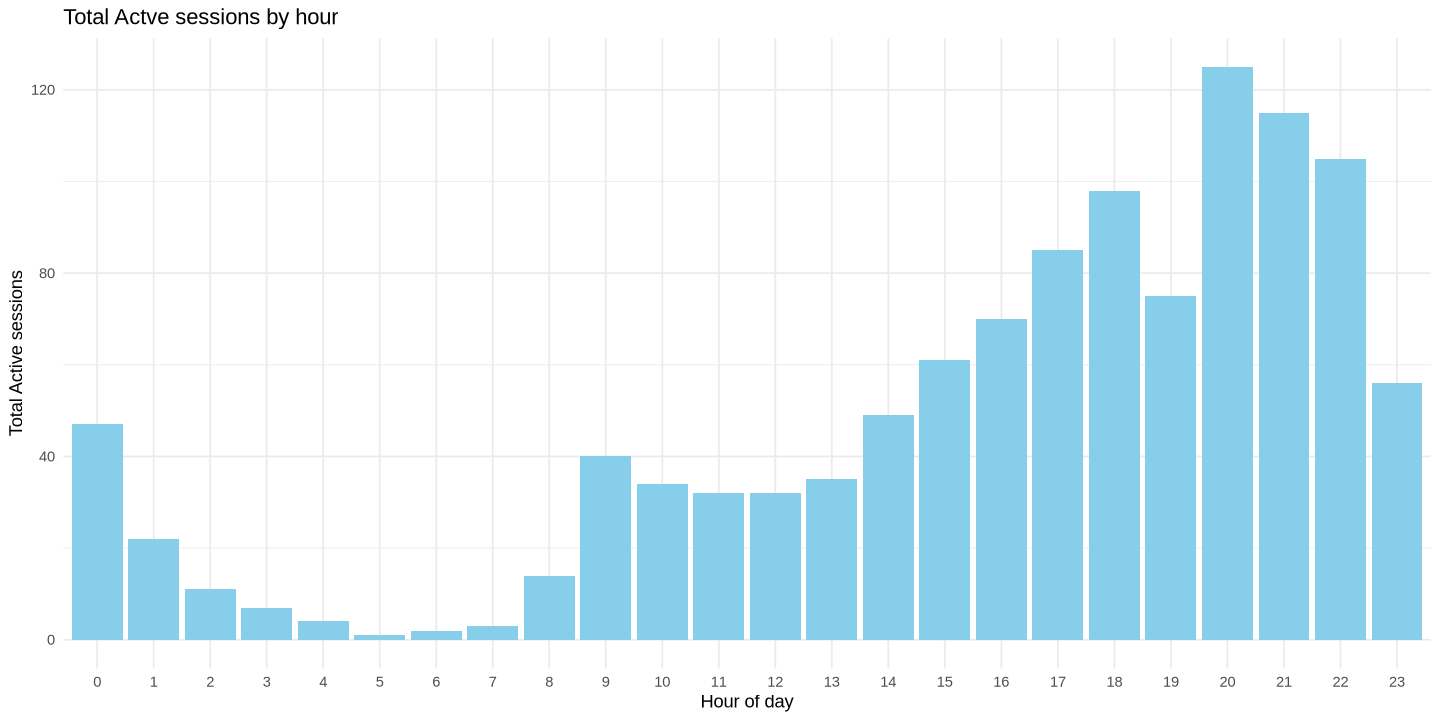

In [11]:
#Show concurrent sessions by hour and the plot

concurrent_sessions<- concurrent_sessions|>
mutate(hour= hour(time))

total_sessions_plot<- ggplot(concurrent_sessions, aes(x= factor(hour), y= active_sessions))+
geom_bar(stat= "identity", fill="skyblue")+
labs(
title="Total Actve sessions by hour",
x="Hour of day",
y="Total Active sessions")+
theme_minimal()
total_sessions_plot


Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


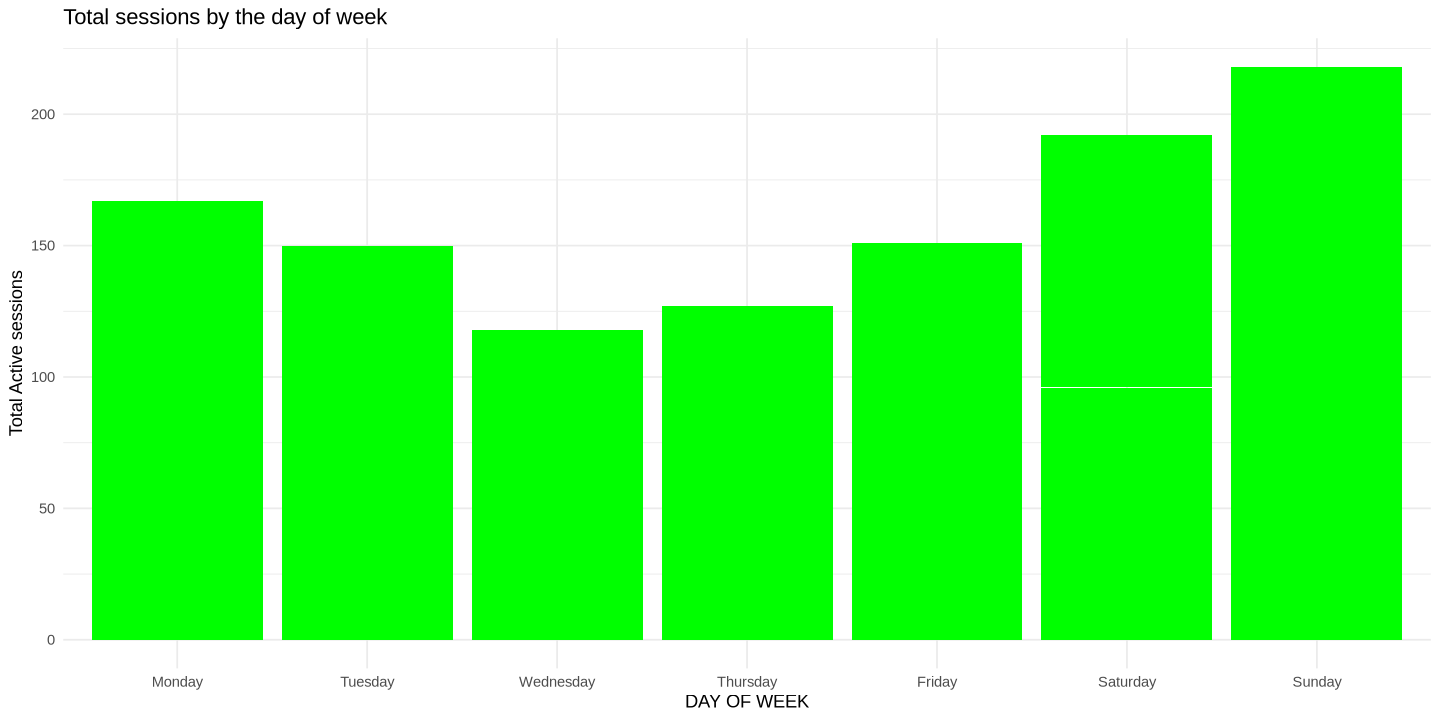

In [12]:
# Day of the week exploratory plot

concurrent_sessions<- concurrent_sessions|>
mutate( day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))
                                                      
dayofweek_exploratory_plot<- ggplot(concurrent_sessions, aes(x= day_of_week, y= active_sessions))+
geom_bar(stat= "identity", fill="green")+
labs(
title="Total sessions by the day of week",
x="DAY OF WEEK",
y="Total Active sessions")+
theme_minimal()
dayofweek_exploratory_plot


Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


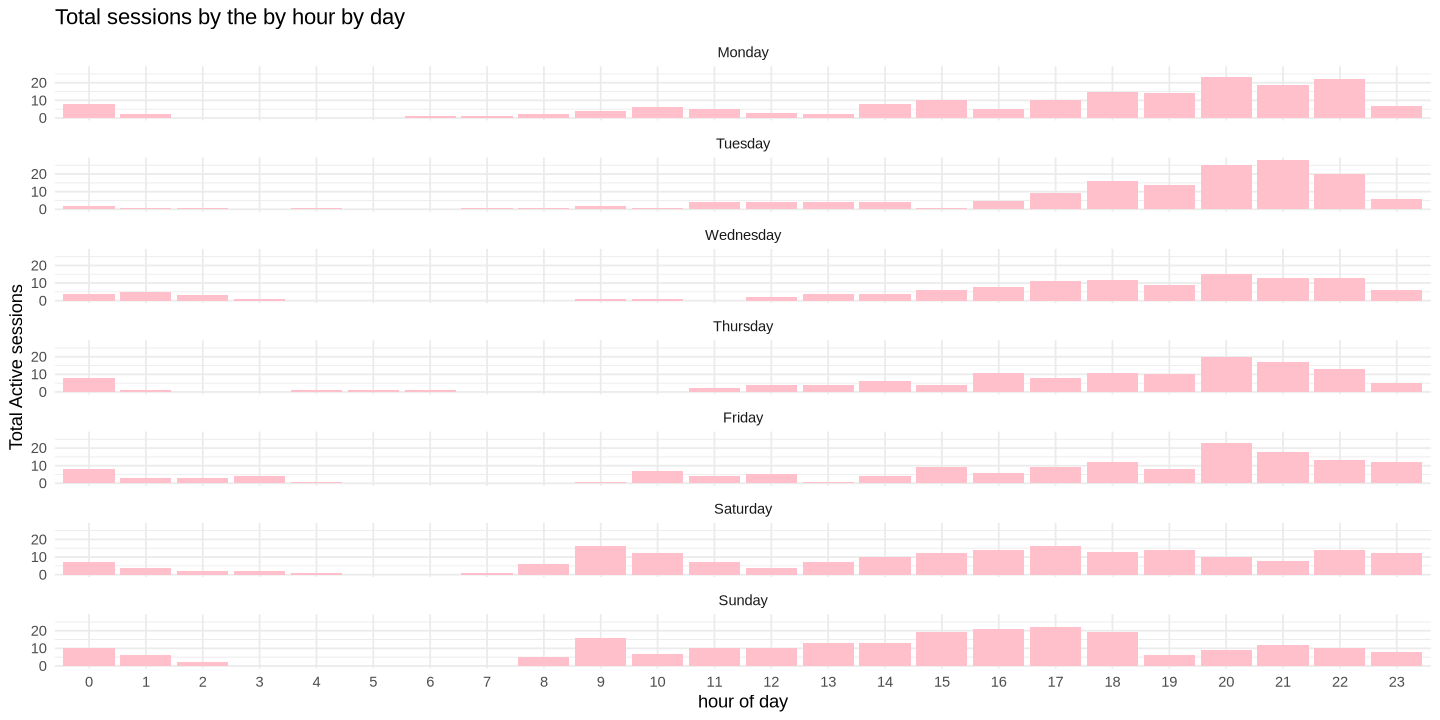

In [13]:
#Show concurrent sessions by hour and day of week

concurrent_sessions<- concurrent_sessions|>
mutate(
hour=hour(time),
day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))

Total_sessions_dayofweek <- ggplot(concurrent_sessions, aes(x=factor(hour), y= active_sessions))+
geom_bar(stat= "identity", fill="pink")+
facet_wrap(~ day_of_week, ncol=1)+
labs(
title="Total sessions by the by hour by day",
x="hour of day",
y="Total Active sessions")+
theme_minimal()
Total_sessions_dayofweek



hashedEmail,start_time,end_time,original_start_time,original_end_time,play_duration_minutes,day_of_week,start_hour,start_time_of_day
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<ord>,<int>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 11:12:00,2024-06-30 11:24:00,1.71977e+12,1.71977e+12,12,Sunday,11,11.200000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 16:33:00,2024-06-17 16:46:00,1.71867e+12,1.71867e+12,13,Monday,16,16.550000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 10:34:00,2024-07-25 10:57:00,1.72193e+12,1.72193e+12,23,Thursday,10,10.566667
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-24 20:22:00,2024-07-24 20:58:00,1.72188e+12,1.72188e+12,36,Wednesday,20,20.366667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 09:01:00,2024-05-25 09:12:00,1.71665e+12,1.71665e+12,11,Saturday,9,9.016667
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 08:08:00,2024-06-23 10:10:00,1.71916e+12,1.71916e+12,122,Sunday,8,8.133333


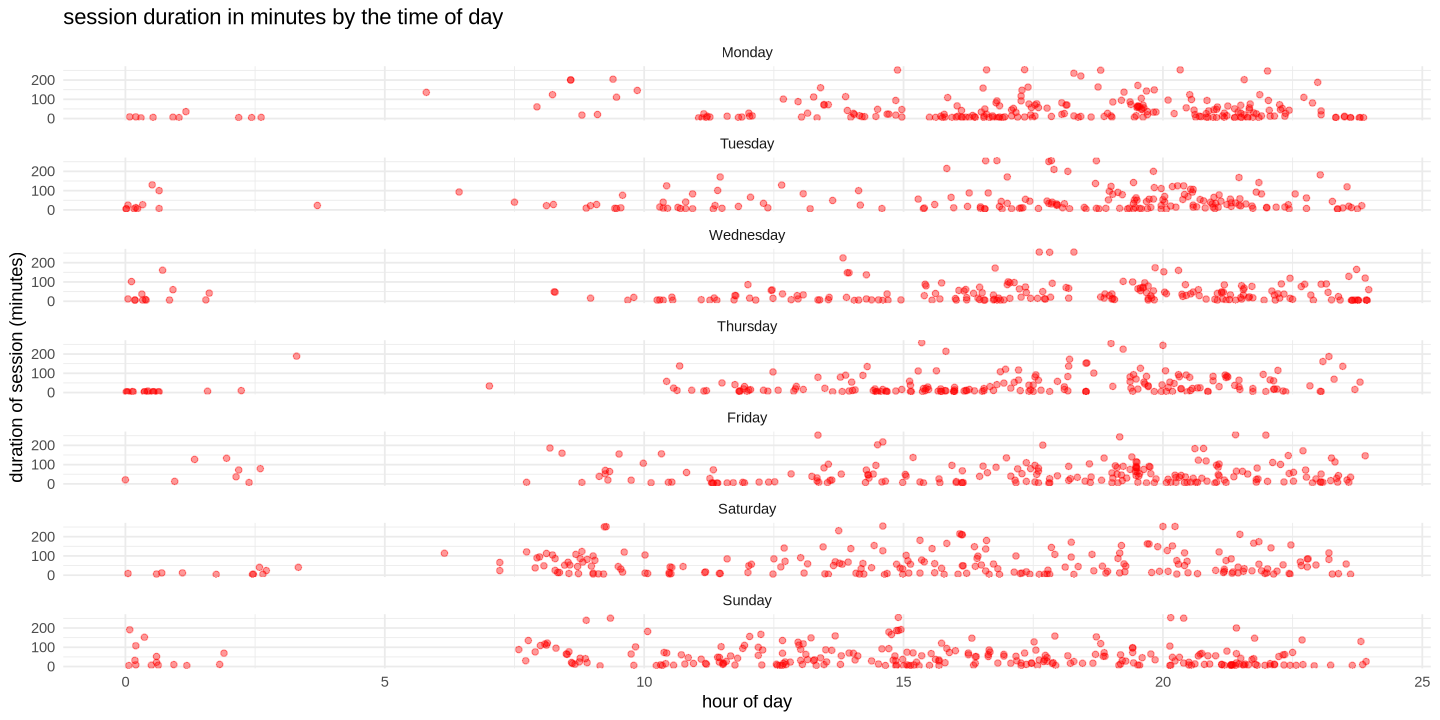

In [14]:
#Scatter plot of start_time_of_day vs. play_duration_minutes
sessions_durations <-sessions_durations |>
mutate(
 day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))
head(sessions_durations)

duration_scatter <- ggplot(sessions_durations , aes(x=start_time_of_day , y= play_duration_minutes ))+
geom_point( alpha= 0.4, color="red")+
facet_wrap(~ day_of_week, ncol=1)+
labs(
title="session duration in minutes by the time of day",
x="hour of day",
y="duration of session (minutes)")+
theme_minimal()
duration_scatter

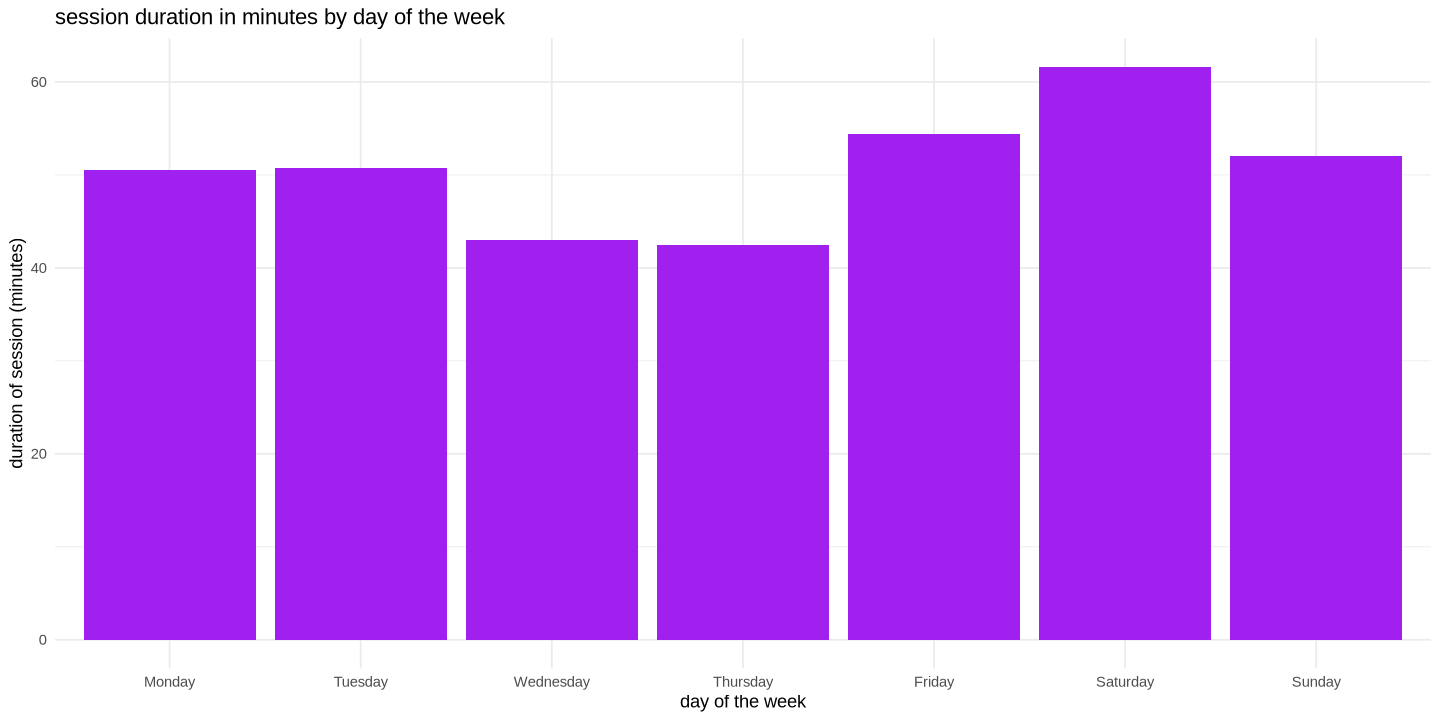

In [15]:
#Bar chart play duration minutes vs day of the week 
avg_duration <- sessions_durations|>
group_by(day_of_week)|>
summarize(avg_play_duration = mean ( play_duration_minutes, na.rm= TRUE))

duration_bar <- ggplot(avg_duration , aes(x= day_of_week  , y= avg_play_duration))+
geom_col( fill="purple")+
labs(
title="session duration in minutes by day of the week",
x="day of the week",
y="duration of session (minutes)")+
theme_minimal()
duration_bar



ANALYSIS OF HOURS REGARDLESS OF WEEK

In [17]:
#Training and testing split 
set.seed(2000)

split_obj<- initial_split( concurrent_sessions, prop= 0.75)

sessions_train <- training(split_obj)
sessions_test <- testing(split_obj)

x_train <- sessions_train|>
select(hour)
head(x_train)

y_train<- sessions_train|>
pull(active_sessions)
head(y_train)

x_test <- sessions_test|>
select(hour)
head(x_test)

y_test<- sessions_test|>
pull(active_sessions)
head(y_test)

hour
<int>
23
22
16
14
20
10


[1]  0 NA NA  1  2  0

hour
<int>
2
6
8
9
11
16


[1] 0 0 0 0 0 1

In [18]:
# KNN- regression
knn_recipe <- recipe(active_sessions ~ hour, data = sessions_train) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# Model specification
knn_spec <- nearest_neighbor( mode = "regression", neighbors = tune() )|>
  set_engine("kknn")

# Workflow
knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

# Tuning grid: neighbors 1 to 49
knn_grid <- tibble(neighbors = 1:49)

# Resampling setup: 5-fold CV
set.seed(2000)
folds <- vfold_cv(sessions_train, v = 5)

# Tune the model
knn_tuned <- tune_grid( knn_workflow,
  resamples = folds,
  grid = knn_grid,
  metrics = metric_set(rmse) )

# Get best model
best_knn <- knn_tuned |>
 select_best("rmse")

# Finalize workflow with best number of neighbors
final_knn_workflow <- knn_workflow |>
  finalize_workflow(best_knn)

# Fit on full training data
final_knn_fit <- final_knn_workflow |>
  fit(data = sessions_train)

# Predict on test data
predictions <- predict(final_knn_fit, sessions_test) |>
  bind_cols(sessions_test)

# Calculate RMSE
rmse(predictions, truth = active_sessions, estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6720252
